<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2025/blob/main/3_Relationships_between_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examining the relationships between genes

## Setup

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cell_metadata = pd.read_csv("/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/20200711_patchseq_metadata_mouse.csv", index_col="cell_specimen_id")
rna_data = pd.read_hdf("/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/gene_counts_ppm.hdf5.lz4")

## Scatterplots and correlation

We can examine the relationship between two continuous variables visually by using scatterplots!

[sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) is seaborn's function for making scatterplots.

In [23]:
# Load the penguins toy dataset
penguins = sns.load_dataset("penguins")
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

For our scatterplots, we must specify an x and y variable.

Text(0, 0.5, 'Bill Depth (mm)')

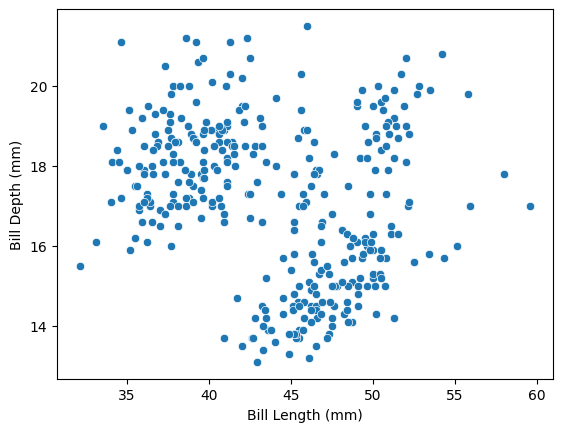

In [24]:
sns.scatterplot(x=penguins["bill_length_mm"], y=penguins["bill_depth_mm"])
# Label the columns - optional (otherwise labels with be auto-generated), but necessary for presentations
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")

We can dilleniate further categorical (or even continuous) variables with hue and style

Text(0, 0.5, 'Bill Depth (mm)')

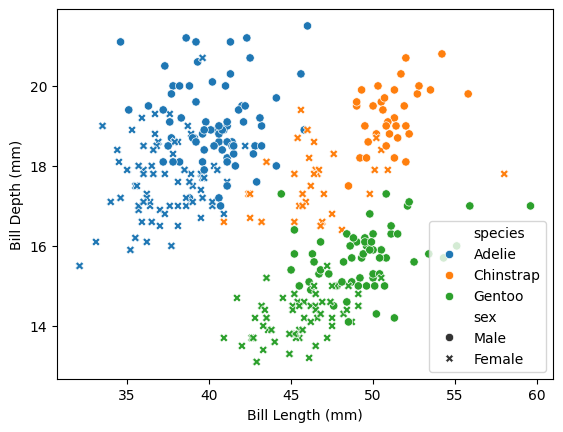

In [22]:
sns.scatterplot(x=penguins["bill_length_mm"], y=penguins["bill_depth_mm"], hue=penguins["species"], style=penguins['sex'])
# Label the columns - optional (otherwise labels with be auto-generated), but necessary for presentations
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")

We can also plot the line of best fit with lmplot

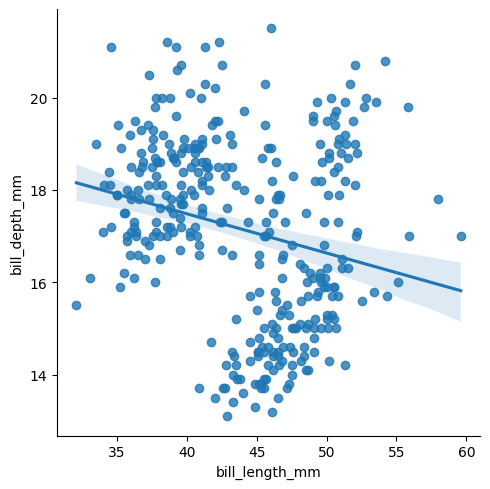

In [13]:
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

This suggests a negative correlation between bill length and depth. **However**, sometimes there can be other factors we should look at -- we know from our previous exploration that phenotype varies substantially between species

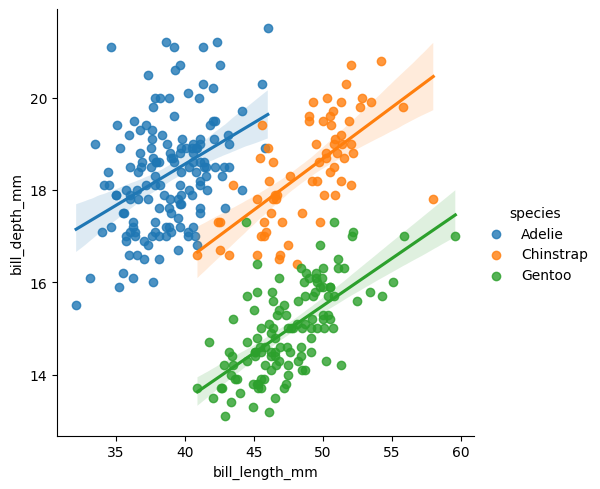

In [12]:
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

We can see that even though there is an overall negative correlation between depth and length, the relationship is positive within each species. This is an example of **Simpson's paradox**

We can quantify the strength of a linear relationship with the Pearson's correlation coefficinet:

In [16]:
from scipy import stats
# we need to drop NaN values before calculating correlation coefficient
penguins = penguins.dropna()
# Calculate r (correlation coefficient) and p-value
r = stats.pearsonr(penguins["bill_length_mm"], penguins["bill_depth_mm"])
r

PearsonRResult(statistic=np.float64(-0.22862563591302903), pvalue=np.float64(2.5282897209443397e-05))

Bill length is negatively correlated with bill depth (r = -0.23)

We can get $r^2$ by squaring the correlation coefficient (which is the first number in the result- second is p-value)

In [18]:
r[0]**2

np.float64(0.05226968139663691)

**5.2% of the variability in bill depth is explained by the linear relationship with bill length**

We can also look at correlation within each species:

In [20]:
gentoo_penguins = penguins[penguins["species"] == "Gentoo"]
stats.pearsonr(gentoo_penguins["bill_length_mm"], gentoo_penguins["bill_depth_mm"])

PearsonRResult(statistic=np.float64(0.6540233142726545), pvalue=np.float64(7.336623629937818e-16))

## Scatterplot practice
Find 2 genes that you would expect to have some sort of relationship, and a 3rd gene that you don't expect to be related.

* Create a scatterplot and get r/R^2 for the first two genes + interpret
* Do the same with one of the genes and the 3rd gene (as a sort of control)